# Analysis of Marx's Work: How communist are the writings of the "father" of communism?
### In my final project, I am analyzing the work of Karl Marx in order to understand the prevalence of discussions of communism within his writing. In order to do this, I am creating wordclouds from "The Manifesto of the Communist Party" and all three installments of his work, "Capital."

As a sociology major, I have read quite a bit of Marx's work. Learning his theory is an essential part in understanding sociological thinking as it relates to our economy and society. The purpose of his work within canon serves to construct an vital power dynamic that pervades capitalist society; that between the working class and the owners of the means of production. However, within larger culture, Marx is believed to be a radical thinker based on his theories of capitalism and his proposed solution to it: communism. Many view Marx's work in a negative light as he believes in and supports the concept of communism, which has historically been "used" to oppress people in countries that adopted the economic system. Although many of these countries were not truly communist, them using the term 'communist' as a label for authoritarian rule has created a perception of Marx that is less than favorable. Within the study of sociology, Marx's work is understood as a criticism of capitalism that offers a "solution" that is more of less unattainable due to the global nature of capitalism. Additionally, the basis of his work is not necessarily discussions of communism.

In considering this, I was curious to see how prevalent discussions of communism are within Marx's work. In this project, I wanted to visualize the most common terms in Marx's most important bodies of writing: "The Manifesto of the Communist Party," "Capital, Volume I," "Capital, Volume II," and "Capital, Volume III." These four books are believed to be the most crucial of all that Marx produced in his lifetime. As such, they are the subject of this analysis. Furthermore, I wanted to utilize wordcloud visualization so that the most frequently used terms and words could be displayed based on their prevalence. This kind of visualization clearly lays out what topics are most important to Marx's work and will highlight whether communism is as central to his writing as it is publically perceived to be.

## import libraries needed

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from string import punctuation
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download("stopwords")
nltk.download("punkt")

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mollypigot/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mollypigot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mollypigot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mollypigot/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mollypigot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Open files and prep them to be visualised

In [55]:
# open .txt files of all sources 
Marx_Manifesto = open('/Users/mollypigot/Desktop/DIGHUM101-2023/CommunistManifesto.txt', encoding = 'utf-8').read()
Marx_Capital_I = open('/Users/mollypigot/Desktop/DIGHUM101-2023/CapitalVolumeI.txt', encoding = 'utf-8').read()
Marx_Capital_II = open('/Users/mollypigot/Desktop/DIGHUM101-2023/CapitalVolumeII.txt', encoding = 'utf-8').read()
Marx_Capital_III = open('/Users/mollypigot/Desktop/DIGHUM101-2023/CapitalVolumeIII.txt', encoding = 'utf-8', errors='ignore').read()

In [56]:
# return a function that removes puncuation from text 
def remove_punctuation(text):
    for char in punctuation:
        text = text.replace(char, " ")
    return text

In [57]:
# remove punctuation from all texts
Marx_Manifesto = remove_punctuation(Marx_Manifesto)
Marx_Capital_I = remove_punctuation(Marx_Capital_I)
Marx_Capital_II = remove_punctuation(Marx_Capital_II)
Marx_Capital_III = remove_punctuation(Marx_Capital_III)

In [58]:
# return a function that puts all letters from text into lowercase
def lowercase(text):
    lowercase_text = text.lower()
    return lowercase_text

In [59]:
# make all texts lowercase
Marx_Manifesto = lowercase(Marx_Manifesto)
Marx_Capital_I = lowercase(Marx_Capital_I)
Marx_Capital_II = lowercase(Marx_Capital_II)
Marx_Capital_III = lowercase(Marx_Capital_III)

## Tokenization 
### Tokenize texts so that stopwords can be removed, the words can be lemmatized, the frequency of each lemmatized token can be counted, and that the texts can be converted into dataframes

In [60]:
Marx_Manifesto = word_tokenize(Marx_Manifesto)
Marx_Capital_I = word_tokenize(Marx_Capital_I)
Marx_Capital_II = word_tokenize(Marx_Capital_II)
Marx_Capital_III = word_tokenize(Marx_Capital_III)

In [61]:
# return a function that removes stopwords from text
def no_stops(text):
    no_stops = [word for word in text if word not in stopwords.words('english')]
    return no_stops

In [62]:
# remove stopwords from all texts
Marx_Manifesto = no_stops(Marx_Manifesto)
Marx_Capital_I = no_stops(Marx_Capital_I)
Marx_Capital_II = no_stops(Marx_Capital_II)
Marx_Capital_III = no_stops(Marx_Capital_III)

In [63]:
# return a function that lemmatizes all tokens from text 
def LemTokens(tokens):
    lemmer = WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

In [64]:
# lemmatize all texts/tokens
Marx_Manifesto = LemTokens(Marx_Manifesto)
Marx_Capital_I = LemTokens(Marx_Capital_I)
Marx_Capital_II = LemTokens(Marx_Capital_II)
Marx_Capital_III = LemTokens(Marx_Capital_III)

In [65]:
# return a function that counts the frequency of each lemmatized token in the text
def frequency(text):
    freq = Counter(text)
    return freq.most_common()

In [66]:
# count the frequency of all lemmatized tokens in each text
Marx_Manifesto = frequency(Marx_Manifesto)
Marx_Capital_I = frequency(Marx_Capital_I)
Marx_Capital_II = frequency(Marx_Capital_II)
Marx_Capital_III = frequency(Marx_Capital_III)

## Create dataframes of each text
### in order to visualize the frequency of words in each text, we must first create dataframes that display all words from the text as well as the number of times each word is present in the text

In [67]:
# return a function that converts the text into dataframes with two columns: "word" and "frequency"
def convert_to_dataframe(text):
    df = pd.DataFrame(text, columns = ['Word','Frequency'])
    return df

In [68]:
# convert all texts into data frames
Marx_Manifesto = convert_to_dataframe(Marx_Manifesto)
Marx_Capital_I = convert_to_dataframe(Marx_Capital_I)
Marx_Capital_II = convert_to_dataframe(Marx_Capital_II)
Marx_Capital_III = convert_to_dataframe(Marx_Capital_III)

Due to the large size of each text, I am reducing the size of each dataframe to 251 words. This is because wordcloud is not capable of creating clouds that consist of as many words that exist in the texts that have been selected in the analysis. By reducing each dataframe to 251 words, we are able to know what the top 251 words are in each text (which is generally a large number of words) and can properly visualize them in the wordclouds

In [69]:
# Reduce the data frames for each text to 251 words
Marx_Manifesto = Marx_Manifesto.head(250)

print(Marx_Manifesto)

              Word  Frequency
0            class        121
1        bourgeois        100
2      bourgeoisie         91
3          society         72
4      proletariat         63
..             ...        ...
245           wife          5
246         others          5
247         merely          5
248     expression          5
249  individuality          5

[250 rows x 2 columns]


In [17]:
Marx_Capital_I = Marx_Capital_I.head(250)

print(Marx_Capital_I)

           Word  Frequency
0        labour       3415
1         value       2846
2           one       1387
3     commodity       1376
4       capital       1260
..          ...        ...
245     present        136
246  difference        136
247        cost        136
248    together        136
249    instance        133

[250 rows x 2 columns]


In [18]:
Marx_Capital_II = Marx_Capital_II.head(250)

print(Marx_Capital_II)

           Word  Frequency
0       capital       5040
1         value       2734
2         money       2150
3     commodity       1835
4    production       1790
..          ...        ...
245  department         87
246     becomes         86
247       whole         86
248     nothing         85
249   concerned         85

[250 rows x 2 columns]


In [19]:
Marx_Capital_III = Marx_Capital_III.head(250)

print(Marx_Capital_III)

           Word  Frequency
0       capital       6516
1         value       3394
2    production       2841
3        profit       2642
4         price       2360
..          ...        ...
245     million        171
246      excess        169
247   following        169
248    required        168
249          15        168

[250 rows x 2 columns]


## Visualization
### Before creating wordclouds for each text, creating barplots of each text allows us to be able to see the scale of the prevalence of words in relation to one another. 

In [74]:
# return a function that plots the most frequent words (lemmatized and with no stopwords)
def make_barplot(DataFrame):
    barplot = DataFrame.head(20).plot.bar(x = 'Word', y = 'Frequency', 
                                  rot = 45, 
                                  title = "Word Frequency Barplot",
                                  color = "maroon",
                                  width = 0.5,
                                  figsize = (40, 15));

    plt.xlabel("Word");
    plt.ylabel("Frequency");
    return barplot

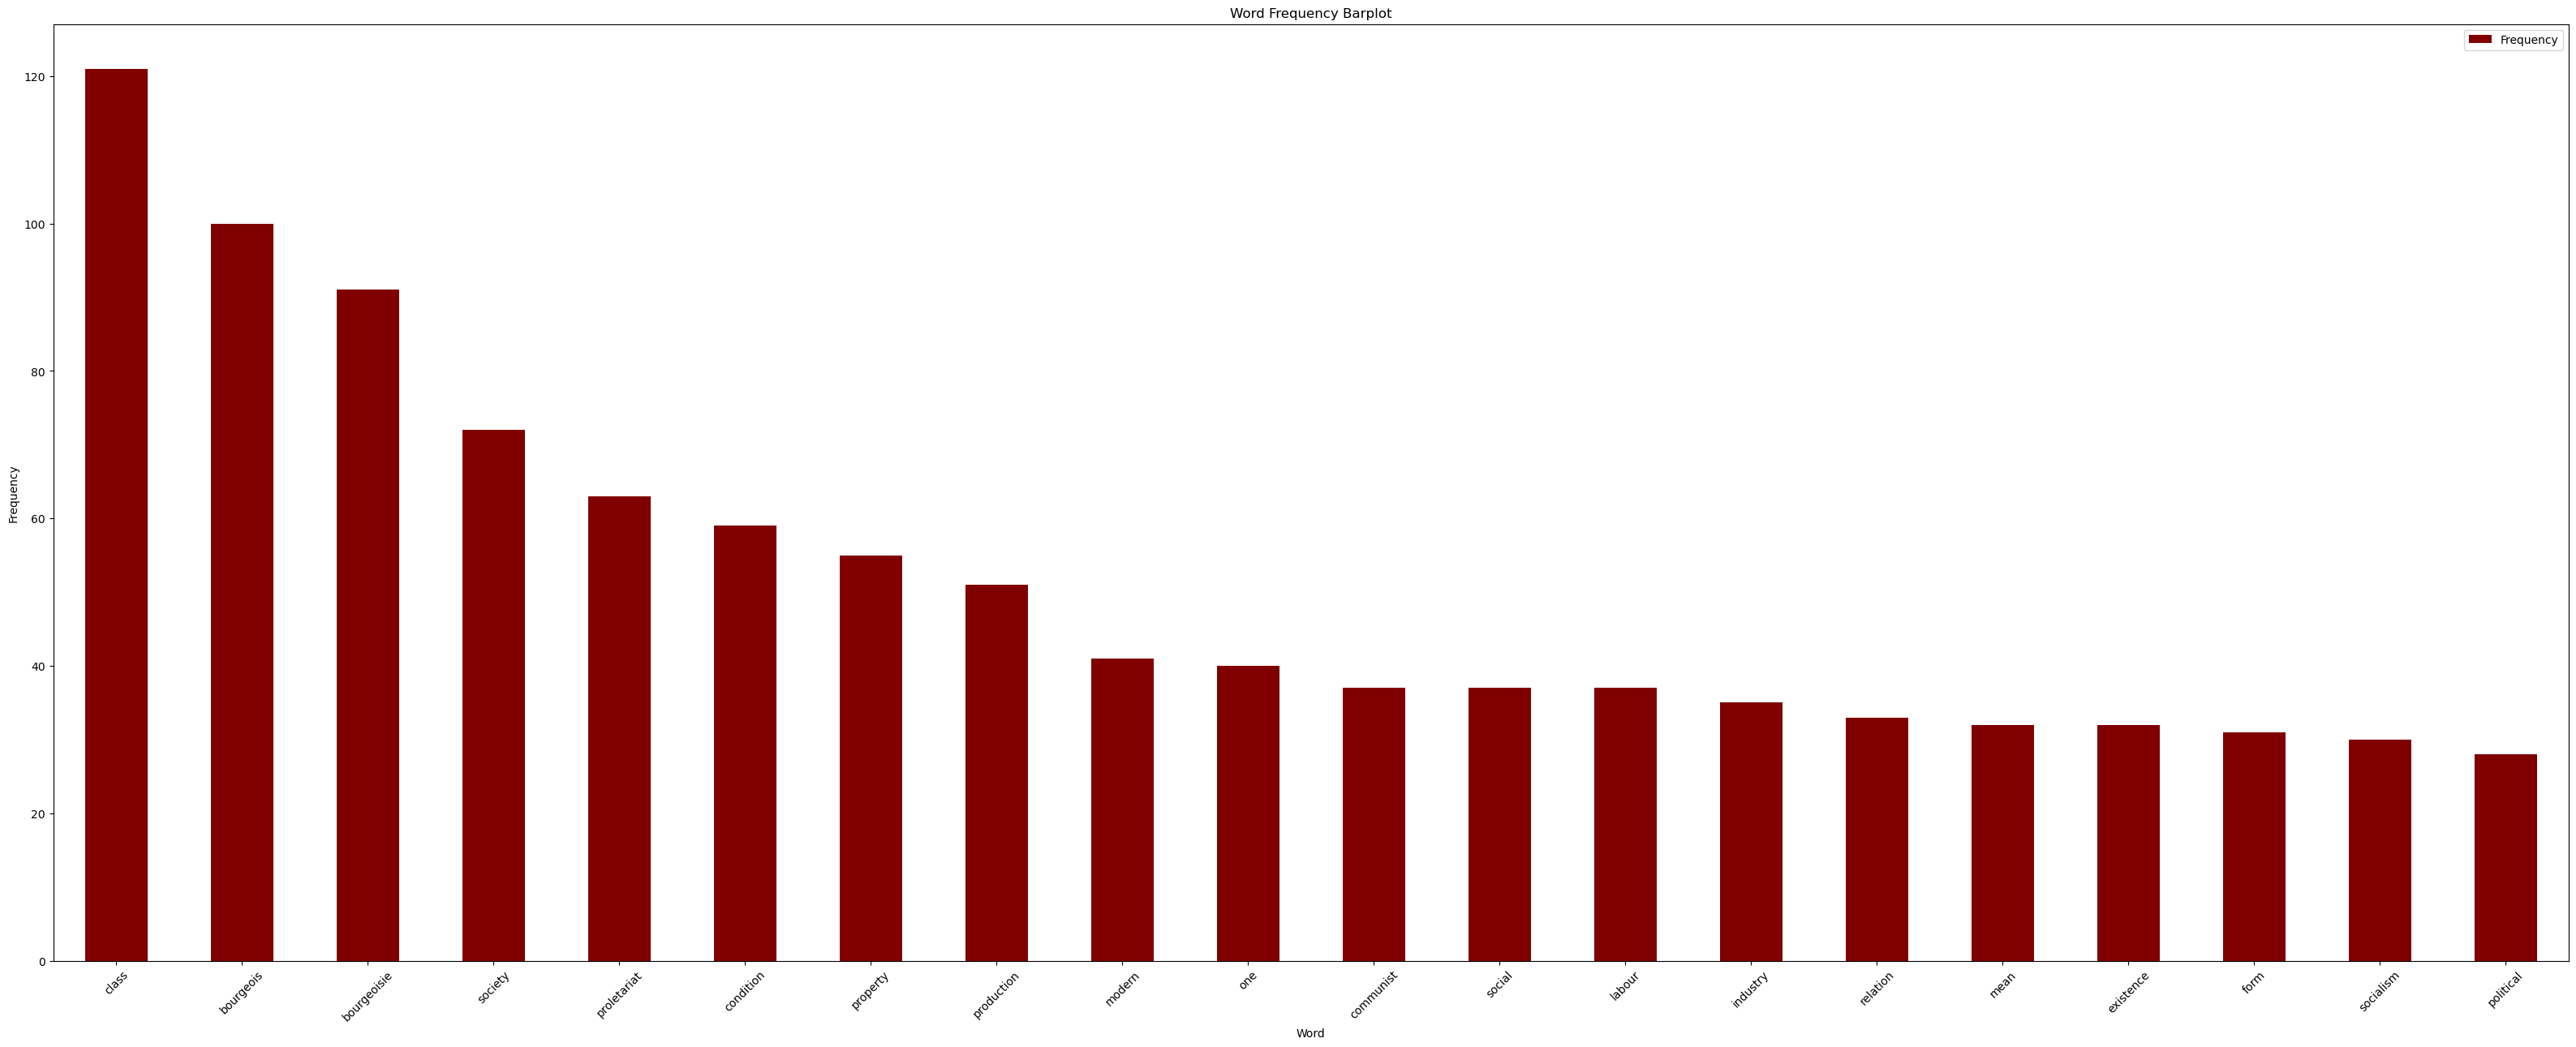

In [75]:
make_barplot(Marx_Manifesto);

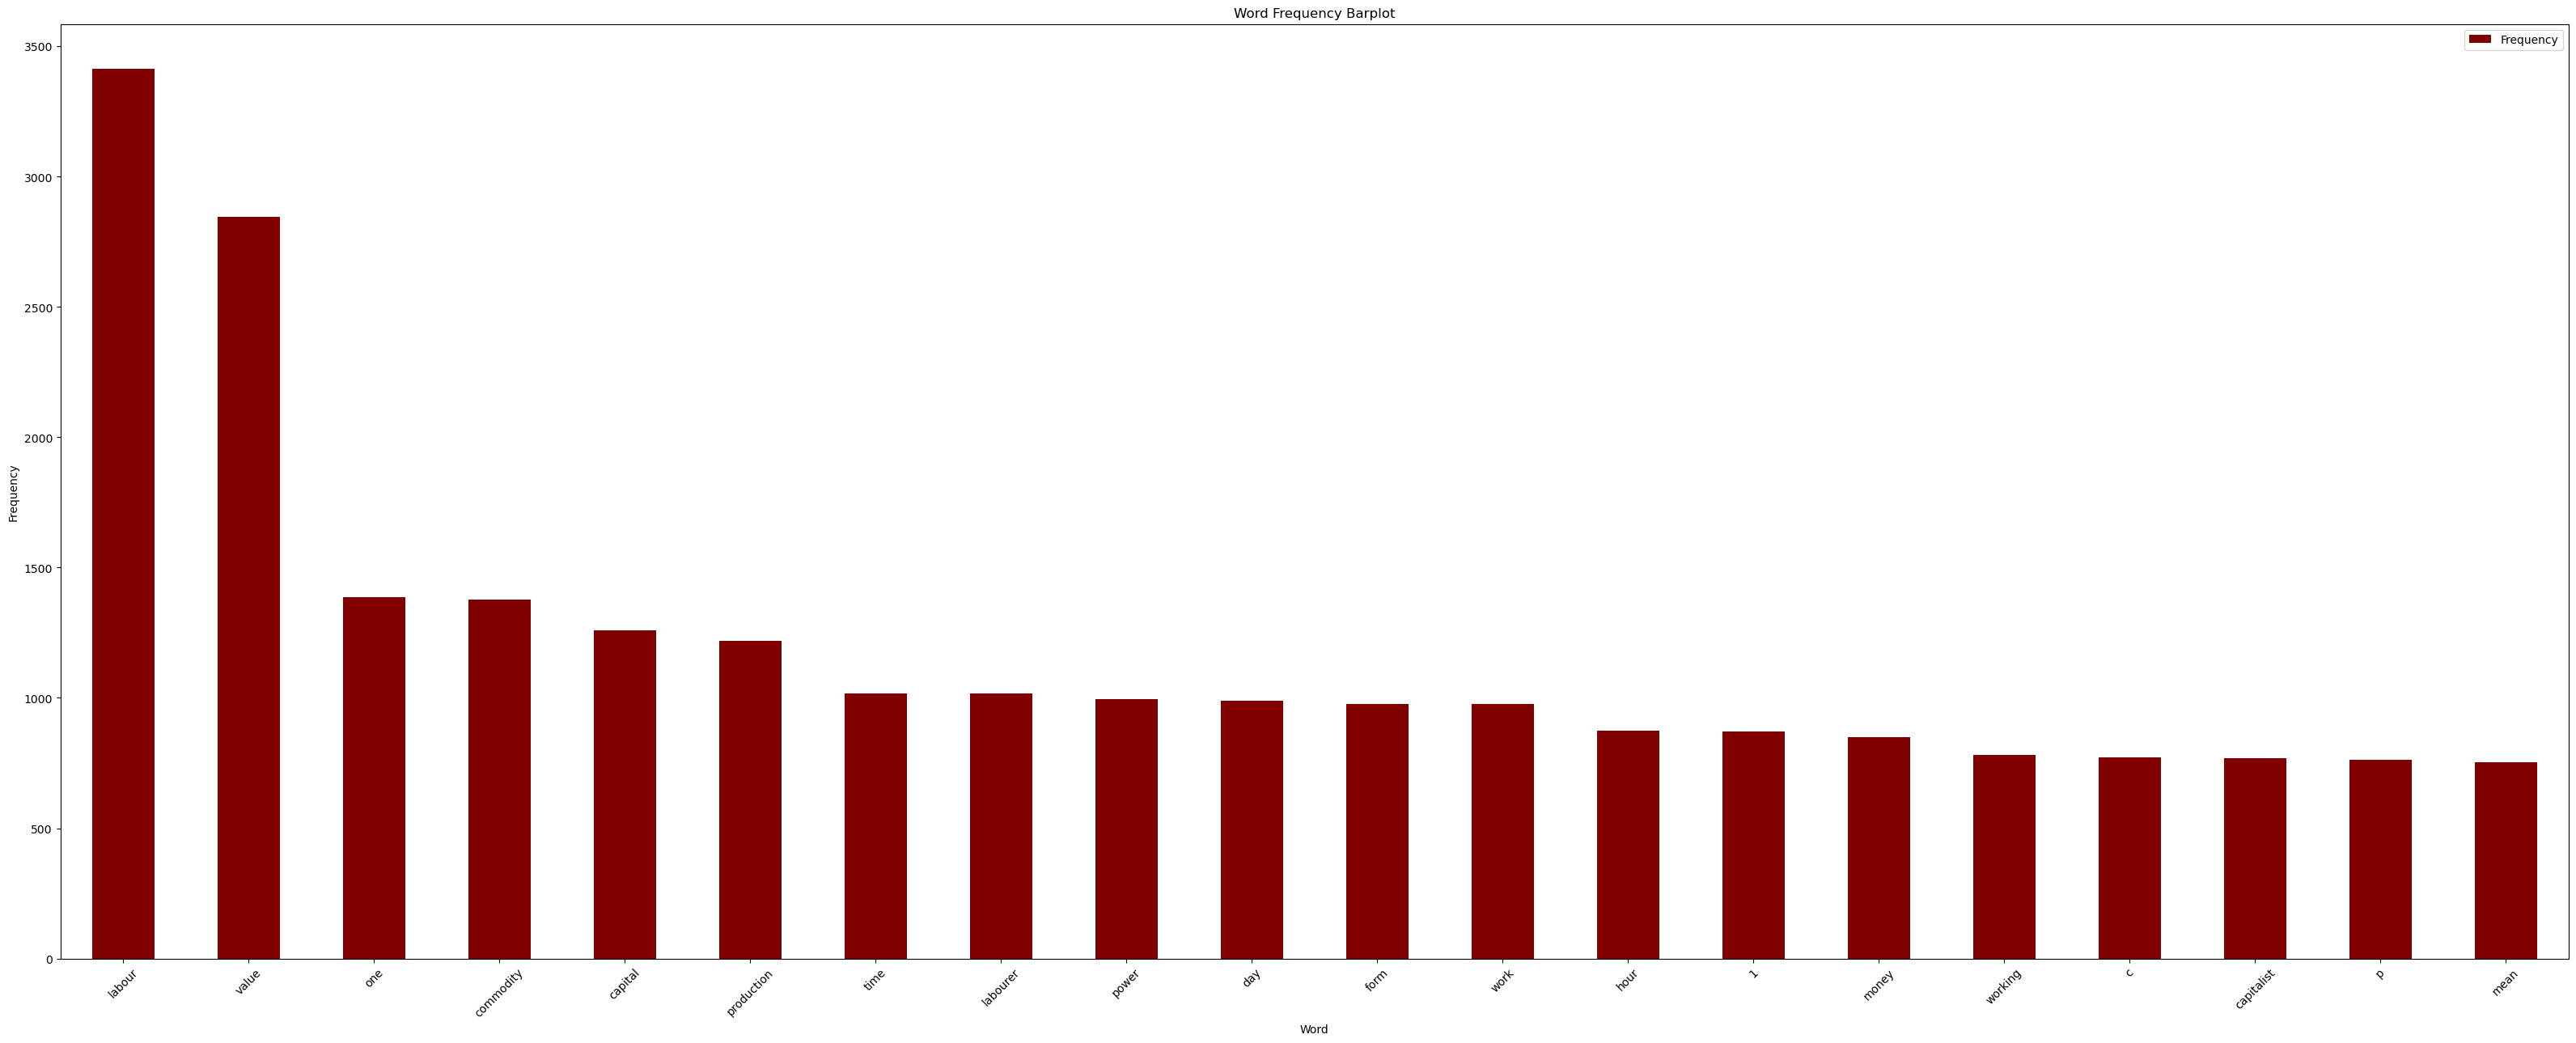

In [76]:
make_barplot(Marx_Capital_I);

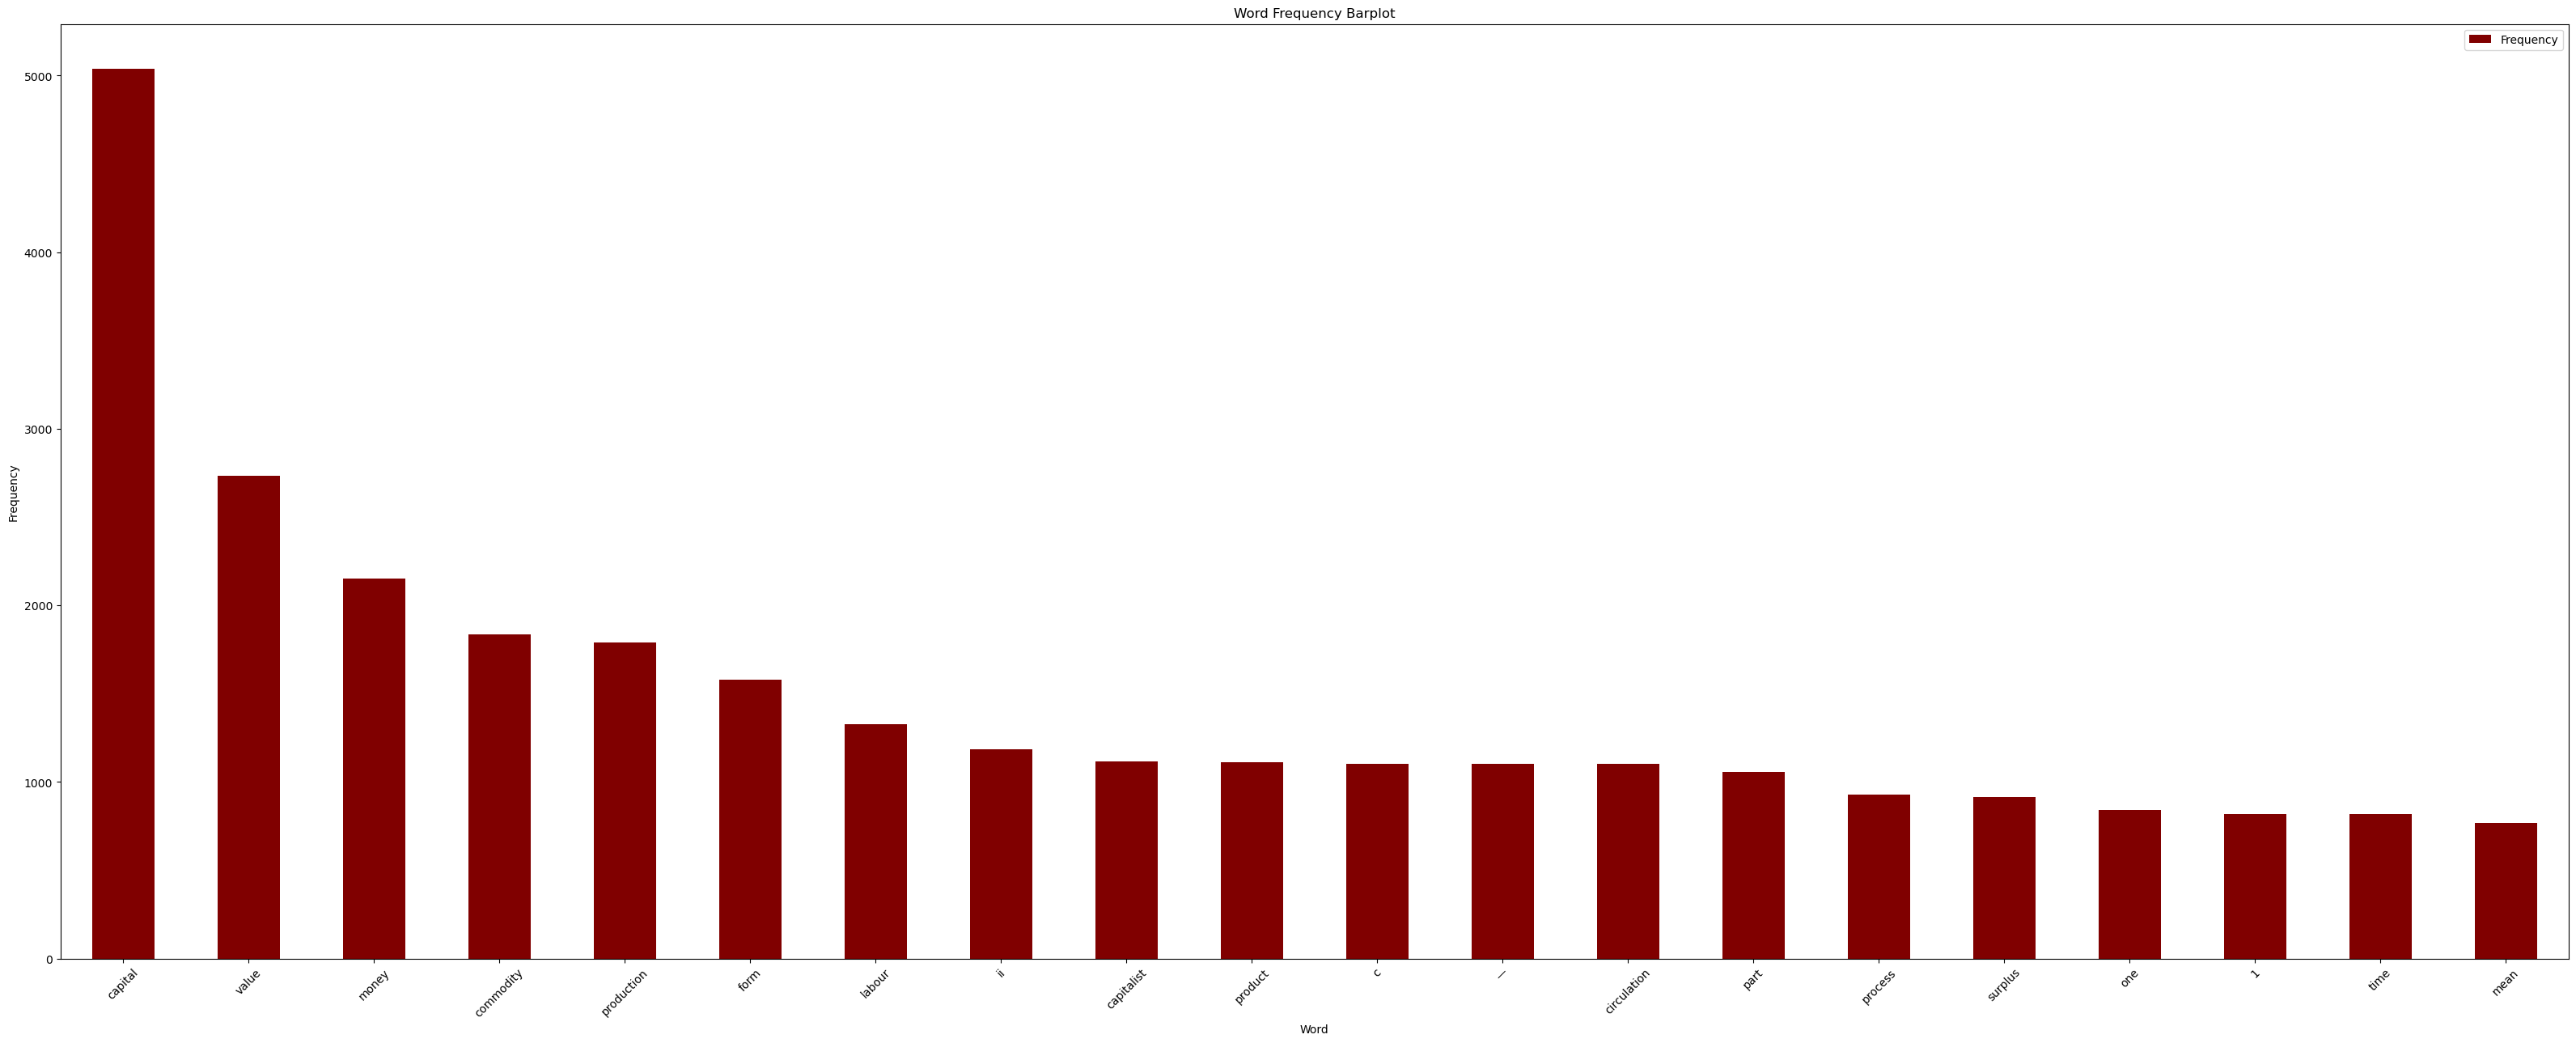

In [77]:
make_barplot(Marx_Capital_II);

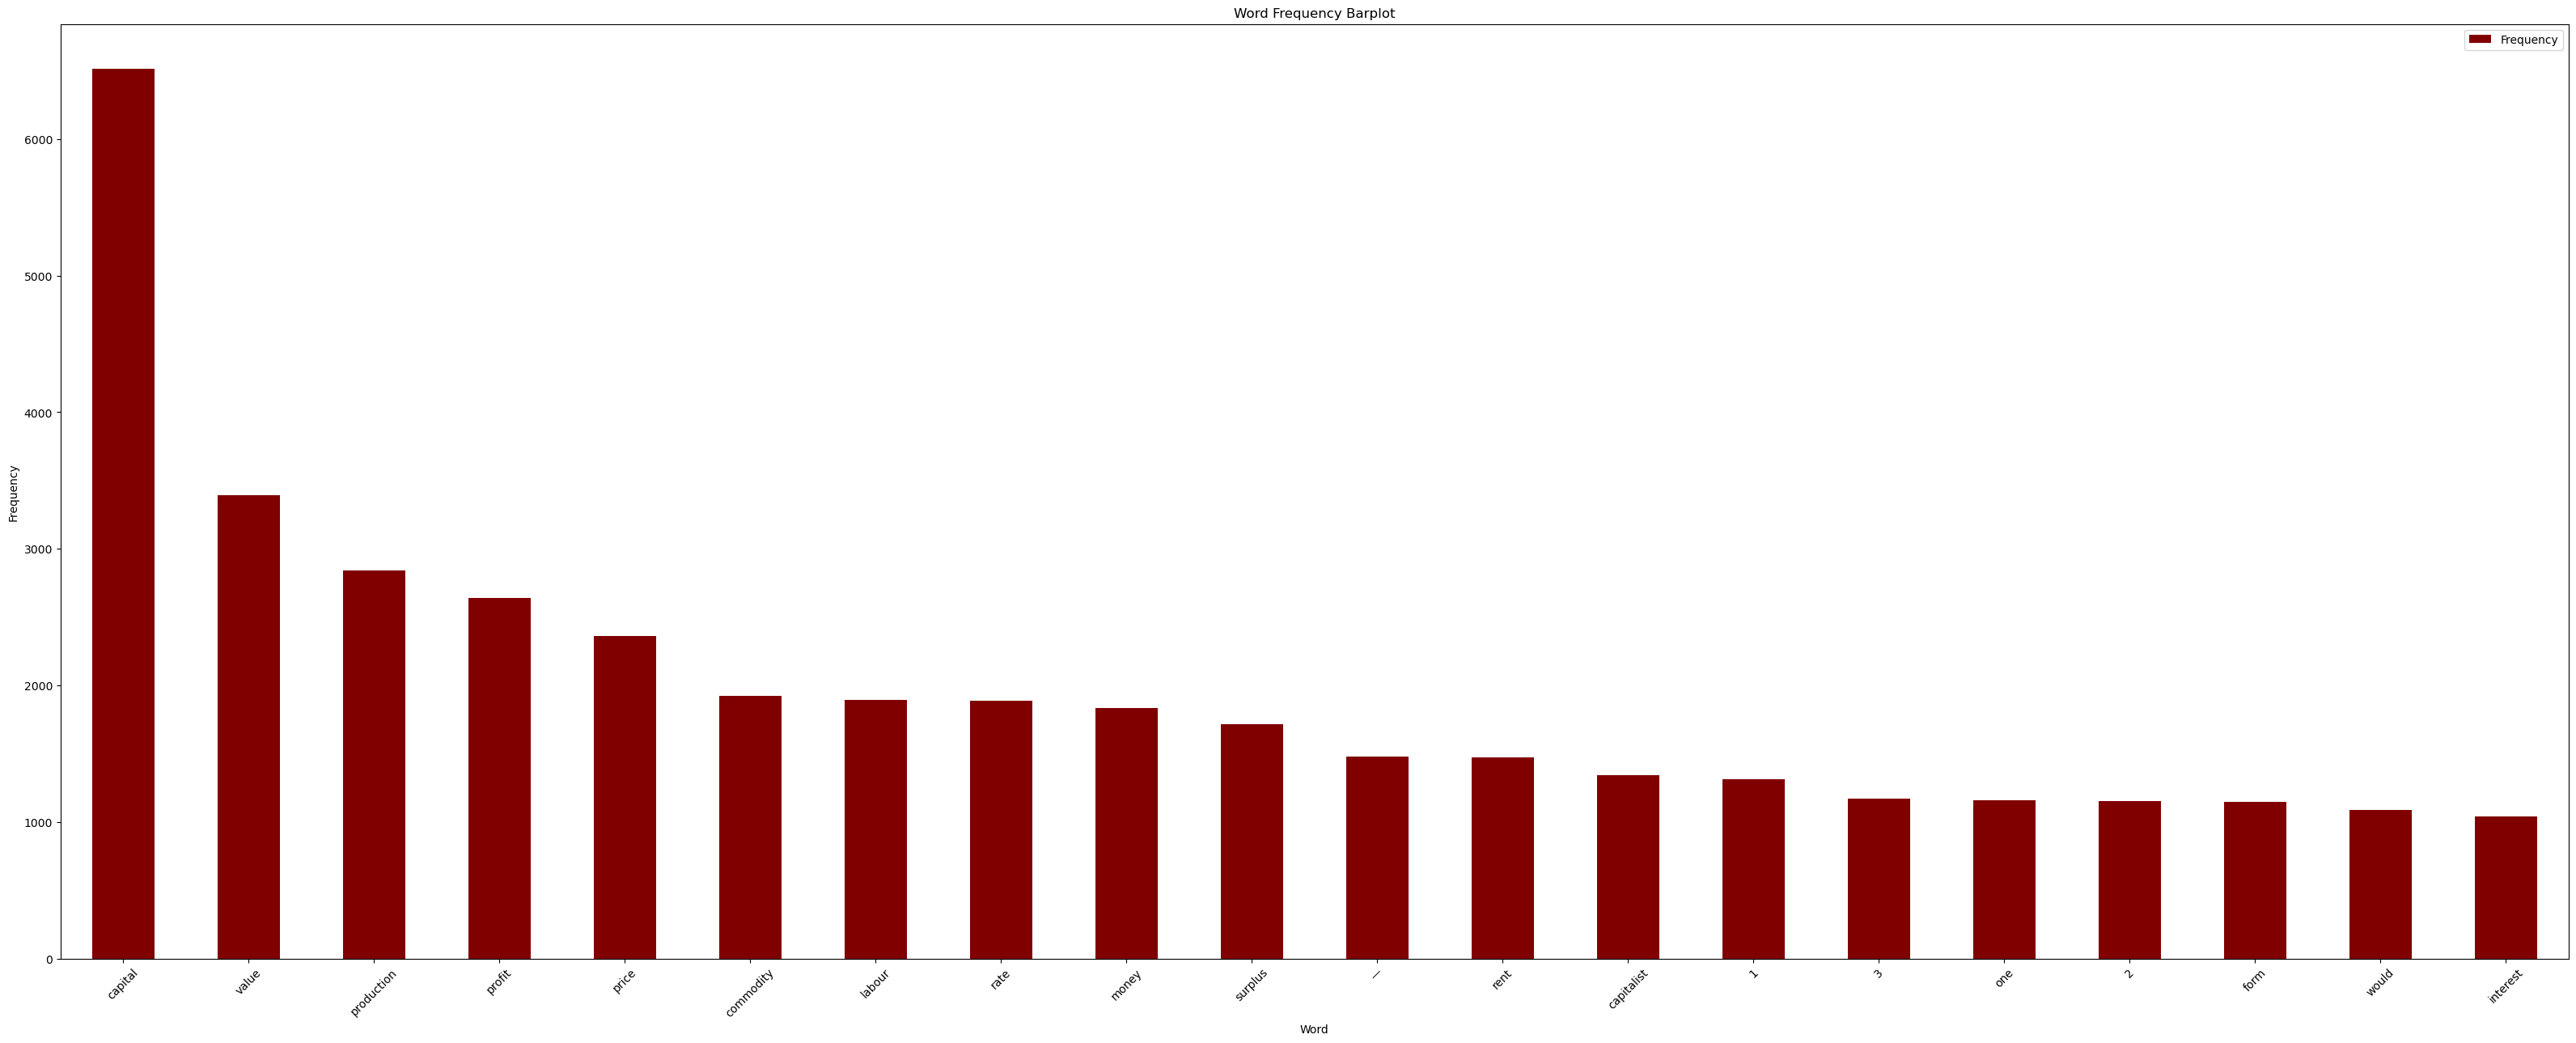

In [79]:
make_barplot(Marx_Capital_III);

## Wordcloud creation

In [71]:
# return a function that allows the creation of wordclouds and defines the parameters for the visualized data
def wordcloud_maker(DataFrame):
    text = DataFrame.Word.values
    wordcloud = WordCloud(
        width = 1500,
        height = 1000,
        max_words = 500,
        background_color = 'white',
        colormap = "magma",
        include_numbers = False,
        relative_scaling = 1,
        stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(
    figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    return wordcloud

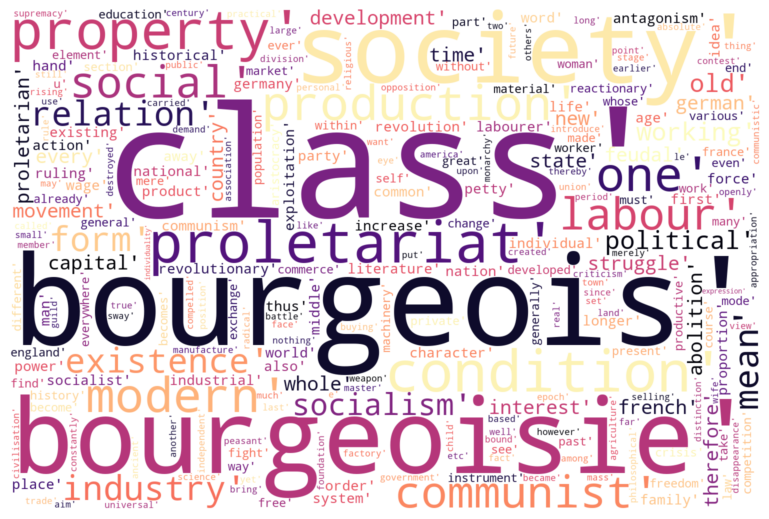

In [73]:
# create wordclouds for all texts
Marx_Manifesto_Cloud = wordcloud_maker(Marx_Manifesto)

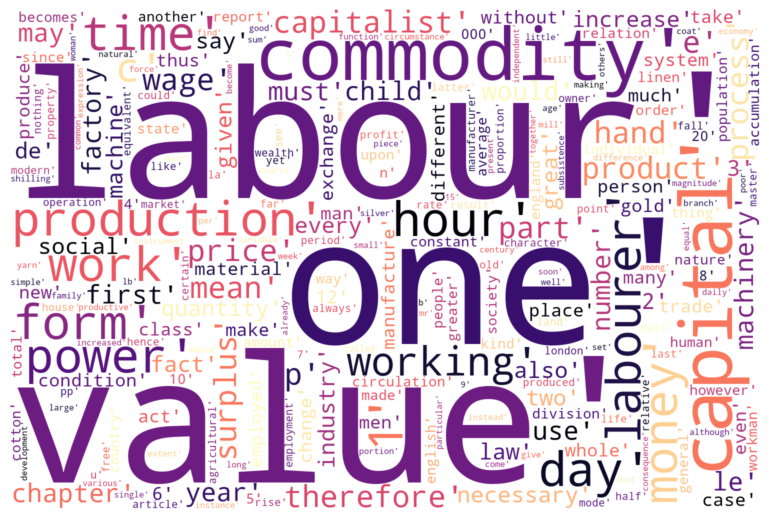

In [36]:
Marx_Capital_I_Cloud = wordcloud_maker(Marx_Capital_I)

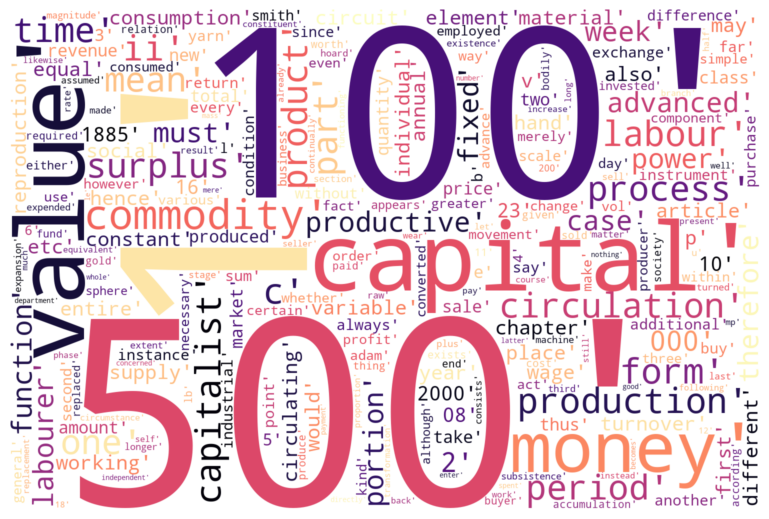

In [34]:
Marx_Capital_II_Cloud = wordcloud_maker(Marx_Capital_II)

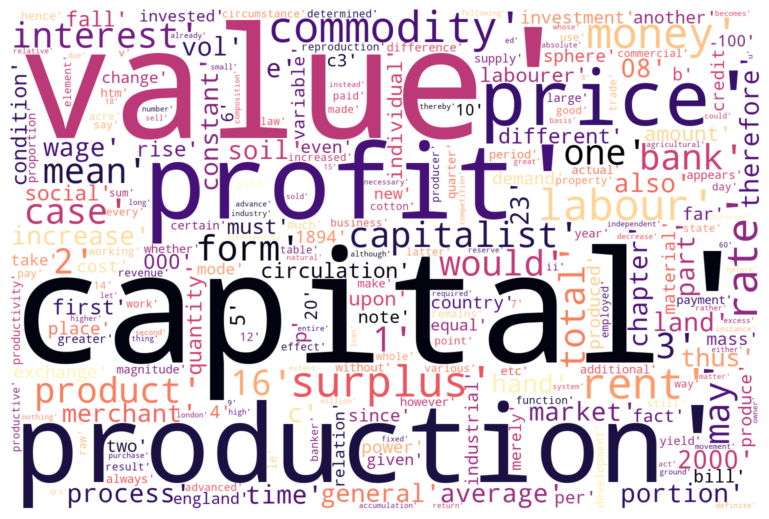

In [35]:
Marx_Capital_III_Cloud = wordcloud_maker(Marx_Capital_III)

# Analysis

Looking at the wordclouds, it does appear as though discussions of communism is not very prevalent within Marx's works. In all texts, words other than 'communist' or 'communism' appear more frequently and as such, are displayed larger. With this, we can conclude that Marx's works are heavier in discussions of capitalism and aspects of capitalist society than they are in discussions of communism. 

The only text to have returned a workcloud containing the word 'comunist' in large display was "The Manifesto of the Communist Party." All other texts returned large diplays of the words 'capital' and 'capitalism,' which infers that the three installments of "Capital" contain large discussions and critiques of capitalism. 

The wordclouds created from the "Capital" texts all contain similar terms, which makes sense considering that they all are from the same anthology. 

Overall, it can be concluded that Marx's work is not as "communist" as may be believed and more truly, are mostly critiques of capitalism and capitalist society. Marx's work is inherently anti-capitalist and are incredibly critical of the economic system as it creates oppresion of the working class. His theory of communism is most prevalent in "The Manifesto of the Communist Party" which seems intuitive as this text serves to promote the agenda and ideals of this way of thinking. However, the discussions of communism in this text are overshadowed by his analysis of capitalism and how to "solve" the issues it creates, implying the text is more anti-capitalist than communist. 